Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Enjui Chang"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

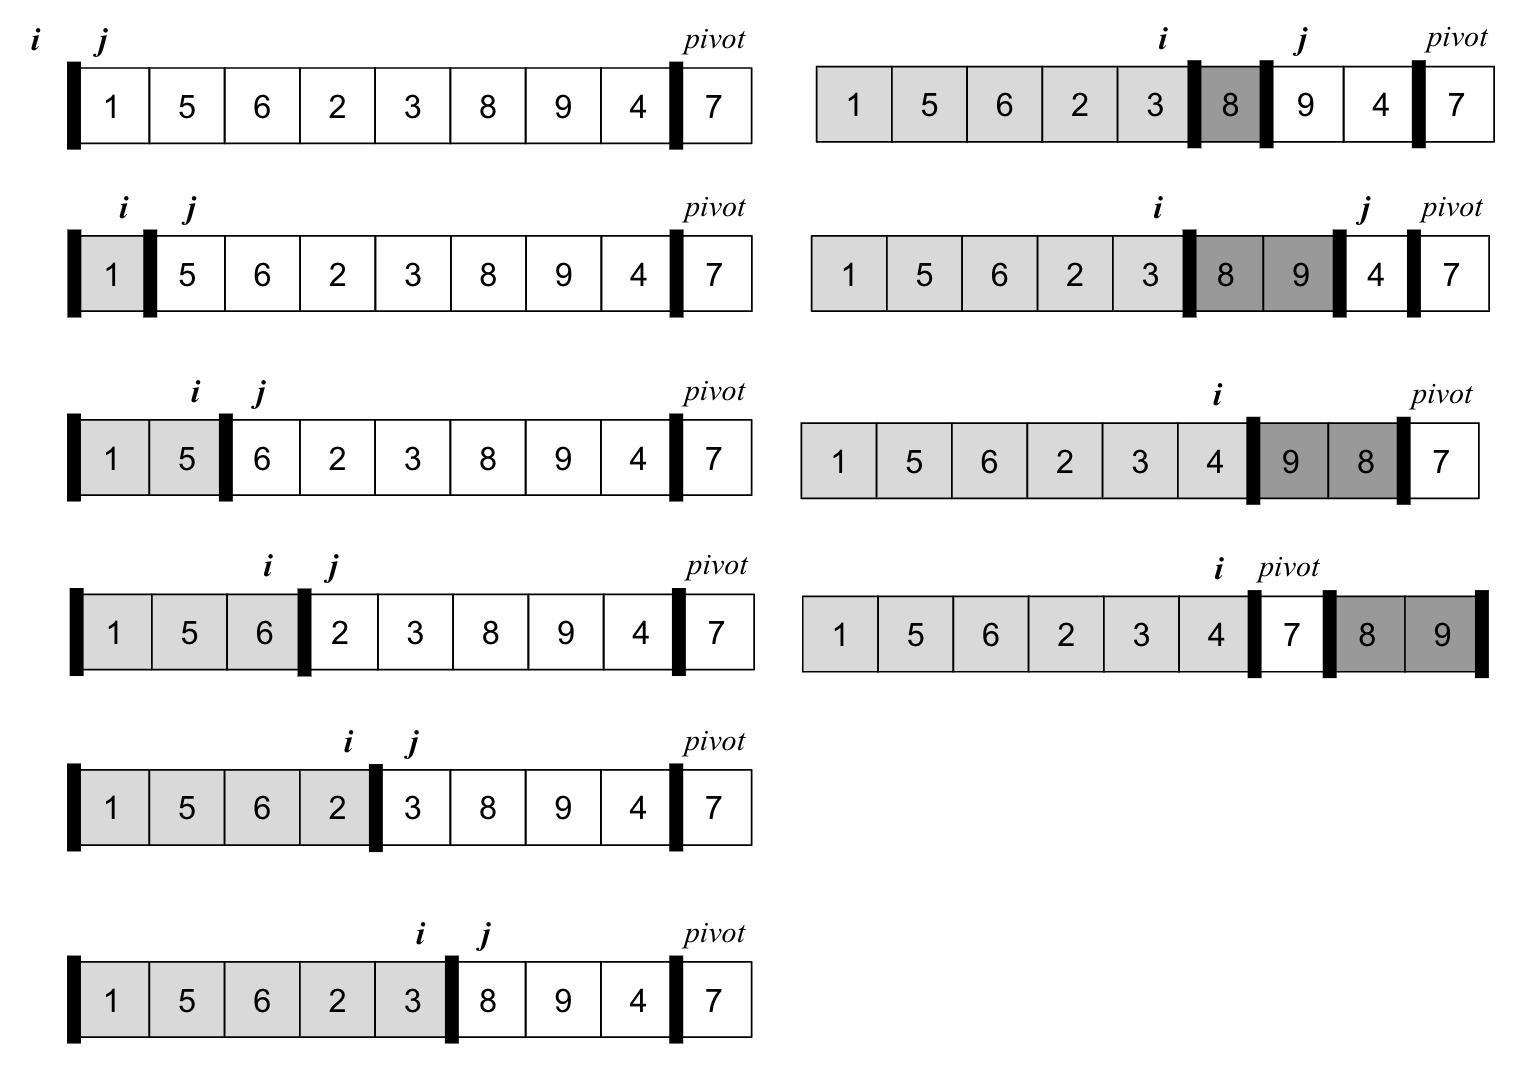

1. The array after the process is done: [1,5,6,2,3,4,7,8,9]
2. The value of  𝑖  after the process is done: 6

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [2]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    #define the pivot element
    pivot = A[r]
    
    #initiate the i indicator
    i = p - 1
    
    #partition the array by spliting into either larger
    #or smaller than the pivot element
    for j in range(p , r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    
    #switch so that the pivot element is greater than the 
    #left side and smaller than the right side
    A[i+1], A[r] = A[r], A[i+1]
    
    #return the the last element for the parition element 
    #for the other recurisve quicksort algorithms
    return i+1

In [3]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [4]:
def quick_sort(A,p,r):
    """
    Sorts the list
    
    -----------------
    input:
    
    A = list of elements
    p = the start of array
    r = the end of the array
    
    output:
    
    A = the sorted list
    """
    #run if the size of the length is larger than 1
    if p < r:
        q = partition(A,p,r) #partition according to the pivot element
        quick_sort(A,p,q-1) #quicksort the smaller-than-pivot subarray
        quick_sort(A,q+1,r) #quicksort the larger-than-pivot subarray
    return A

In [5]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


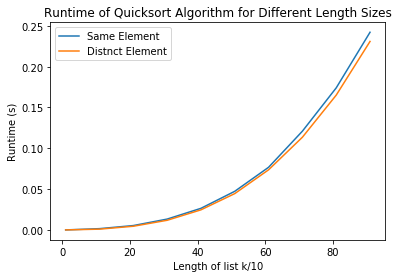

In [7]:
import matplotlib.pyplot as plt
import time
import random

#intialize storage
runtime_lst_same = []
runtime_dummy_same = []
runtime_lst_diff = []
runtime_dummy_diff = []

#number of iterations for averaging the runtime
iteration = 10

#iterate through different sizes of list with a same value
for k in range(1,101,10):
    lst = [1]*10*k #create list
    
    #average the runtime for each list
    for i in range(iteration):
        start=time.time()
        quick_sort(lst, 0, len(lst)-1)
        end = time.time()
        runtime = end-start
        runtime_dummy_same.append(runtime)
    
    #average the runtime for each length
    runtime_lst_same.append(sum(runtime_dummy_same)/iteration)

#iterate through different sizes of list with distinct reversed sorted list
for k in range(1,101,10):
    lst = sorted(random.sample(range(-10000,10001),10*k),reverse=True)#create list
    
    #average the runtime for each list
    for i in range(iteration):
        start=time.time()
        quick_sort(lst, 0, len(lst)-1)
        end = time.time()
        runtime = end-start
        runtime_dummy_diff.append(runtime)
        
    #average the runtime for each length
    runtime_lst_diff.append(sum(runtime_dummy_diff)/iteration)    
    
#plot the graph
k = [i for i in range(1, 101, 10)]
plt.plot(k,runtime_lst_same, label = "Same Element")
plt.plot(k,runtime_lst_diff, label = "Reversed Distinct Element")
plt.xlabel("Length of list k/10")
plt.ylabel("Runtime (s)")
plt.title("Runtime of Quicksort Algorithm for Different Length Sizes")
plt.legend()
plt.show()

Even though there is a small difference between the two list, showing that the same element list has a slight advantage than the reversed distinct list. It is fair to say the running time for both list is apporixmately the same and scales logarithmically, owing to the $O(n \lg n)$ complexity. This shows that the average case would be close to the best-case rather than the worst-case of $O(n^2)$.